<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Practice Project: Titanic Survival Prediction**


Estimated time needed: **30** minutes


## Introduction
Now that you have a feel for how to optimize your machine learning pipeline, let's practice with a real world dataset.  
You'll use cross validation and a hyperparameter grid search to optimize your machine learning pipeline.  

You will use the Titanic Survival Dataset to build a classification model to predict whether a passenger survived the sinking of the Titanic, based on attributes of each passenger in the data set.

You'll start with building a Random Forest Classifier, then modify your pipeline to use a Logistic Regression estimator instead. You'll evaluate and compare your results.

This lab will help prepare you for completing the Final Project.


## Objectives

After completing this lab you will be able to:

 - Use scikit-learn to build a model to solve a classification problem
 - Implement a pipeline to combine your preprocessing steps with a machine learning model
 - Interpret the results of your modelling
 - Update your pipeline with a different machine learning model
 - Compare the preformances of your classifiers


----


### Install the required libraries


In [2]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
!pip install seaborn

### Import the required libraries


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Titanic Passenger data set
We'll be working with the Titanic passenger dataset to build a classification model to predict whether a passenger survied the sinking of the Titanic.  
Here is the data dictionary:

| Variable   |	Definition   |
 |:------|:--------------------------------|
 |survived | survived? 0 = No, 1 = yes  |
 |pclass | Ticket class (int)  |
 |sex	 |sex |
 |age	 | age in years  |
 |sibsp  |	# of siblings / spouses aboard the Titanic |
 |parch  |	# of parents / children aboard the Titanic |
 |fare   |	Passenger fare   |
 |embarked | Port of Embarkation |
 |class  |Ticket class (obj)   |
 |who    | man, woman, or child  |
 |adult_male | True/False |
 |alive  | yes/no  |
 |alone  | yes/no  |


## Load the Titanic dataset using Seaborn


In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Select relevant features and the target


In [5]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

#### Features to drop
`deck` has a lot of missing values so we'll drop it. `age` has quite a few missing values as well. Although it could be, `embarked` and `embark_town` don't seem relevant so we'll drop them as well. It's unclear what `alive` refers to so we'll ignore it.
#### Target
`survived` is our target class variable.


In [6]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

X = titanic[features]
y = titanic[target]

### Exercise 1. How balanced are the classes?


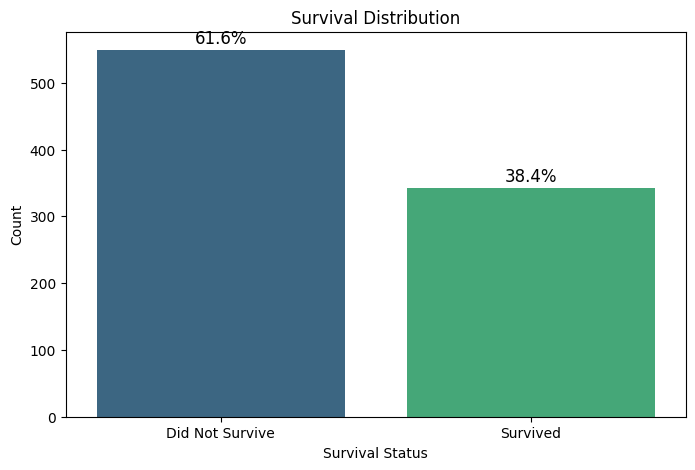

In [9]:
# Check class distribution
survival_counts = df['survived'].value_counts()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Survival': ['Did Not Survive', 'Survived'],
    'Count': survival_counts.values
})

# Create visualization
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Survival', y='Count', data=plot_df, 
                 hue='Survival', palette='viridis', legend=False)

plt.title('Survival Distribution')
plt.xlabel('Survival Status')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for i, count in enumerate(survival_counts):
    percentage = f'{count/total:.1%}'
    ax.text(i, count+10, percentage, ha='center', fontsize=12)

plt.show()

<details><summary>Click here for the solution</summary>
    
```python
y.value_counts()
```
```
So about 38% of the passengers in the data set survived.  
Because of this slight imbalance, we should stratify the data when performing train/test split and for cross-validation.
```


### Exercise 2. Split the data into training and testing sets
Don't forget to consider imbalance in the target


In [ ]:
# Enter your code here:
X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size=0.2, stratify=..., random_state=42)

In [10]:
# Define features (X) and target (y)
X = df.drop('survived', axis=1)  # Features
y = df['survived']               # Target

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# Verify stratification
print("Original class distribution:")
print(y.value_counts(normalize=True))

print("\nTraining set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Original class distribution:
survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Training set class distribution:
survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Test set class distribution:
survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


<details><summary>Click here for the solution</summary>
    
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
```


### Define preprocessing transformers for numerical and categorical features
#### Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features


In [11]:
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
# Automatically detect numerical and categorical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Manual adjustment: pclass should be categorical even though it's numerical in type
if 'pclass' in numerical_features:
    numerical_features.remove('pclass')
    categorical_features.append('pclass')

# Display results
print("Automatically Detected Numerical Features:", numerical_features)
print("Automatically Detected Categorical Features:", categorical_features)

# Verify with data types
print("\nData Types in X_train:")
print(X_train.dtypes)

Automatically Detected Numerical Features: ['age', 'sibsp', 'parch', 'fare']
Automatically Detected Categorical Features: ['sex', 'embarked', 'pclass']

Data Types in X_train:
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object


#### Define separate preprocessing pipelines for both feature types


In [13]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#### Combine the transformers into a single column transformer
We'll use the sklearn "column transformer" estimator to separately transform the features, which will then concatenate the output as a single feature space, ready for input to a machine learning estimator.


In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Create a model pipeline
Now let's complete the model pipeline by combining the preprocessing with a Random Forest classifier


In [15]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Define a parameter grid 
We'll use the grid in a cross validation search to optimize the model


In [16]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

### Perform grid search cross-validation and fit the best model to the training data


In [17]:
# Cross-validation method
cv = StratifiedKFold(n_splits=5, shuffle=True)

### Exercise 3. Train the pipeline model 


In [ ]:
# Enter your code here
model = GridSearchCV(estimator=..., param_grid=..., cv=..., scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create the complete pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Set up stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create and train the GridSearchCV model
model = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1  # Use all available CPU cores for faster computation
)

print("Starting model training with GridSearchCV...")
model.fit(X_train, y_train)
print("\nModel training completed!")

# Display best parameters and score
print("\nBest Parameters:", model.best_params_)
print("Best CV Accuracy: {:.2%}".format(model.best_score_))

Starting model training with GridSearchCV...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   0.7s
[CV] END classifier__max_depth=None, classifier__min_samples_

<details><summary>Click here for the solution</summary>
    
```python
model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)
```


### Exercise 4. Get the model predictions from the grid search estimator on the unseen data
Also print a classification report


In [ ]:
# Enter your code here:
y_pred = model. ...(...)
print(classification_report(y_test, y_pred))

In [21]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))

# Additional detailed evaluation
print("\nDetailed Performance Analysis:")
print("-" * 60)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(2))


Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Detailed Performance Analysis:
------------------------------------------------------------
              precision  recall  f1-score  support
0                  0.83    0.87      0.85   110.00
1                  0.78    0.71      0.74    69.00
accuracy           0.81    0.81      0.81     0.81
macro avg          0.80    0.79      0.80   179.00
weighted avg       0.81    0.81      0.81   179.00


<details><summary>Click here for the solution</summary>
    
```python
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
```


### Exercise 5. Plot the confusion matrix 


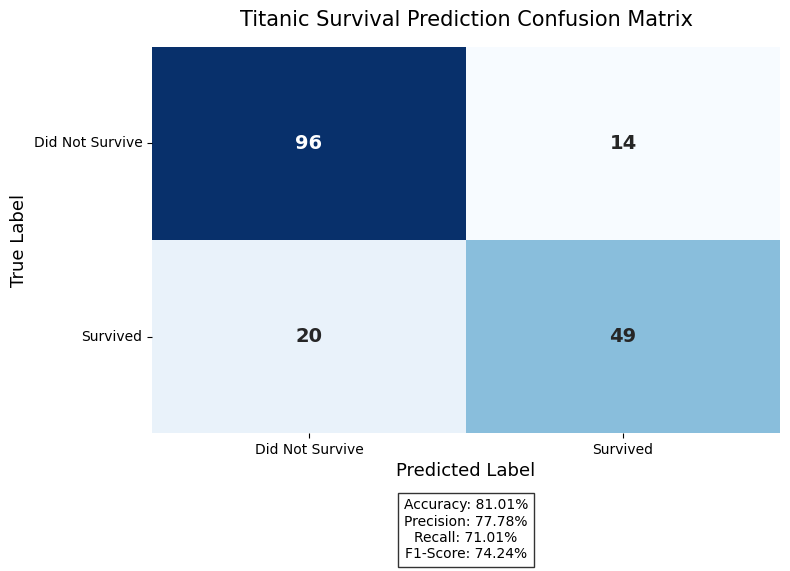

In [22]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create enhanced confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            annot_kws={'size': 14, 'weight': 'bold'},
            cbar=False)

# Add labels and title
plt.title('Titanic Survival Prediction Confusion Matrix', fontsize=15, pad=15)
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)

# Add class labels to axes
class_names = ['Did Not Survive', 'Survived']
tick_marks = [0.5, 1.5]  # Center of each cell
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names, rotation=0)

# Add performance metrics to plot
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
precision = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[0,1])
recall = conf_matrix[1,1] / (conf_matrix[1,1] + conf_matrix[1,0])
f1 = 2 * (precision * recall) / (precision + recall)

plt.text(0.5, -0.25, 
         f'Accuracy: {accuracy:.2%}\nPrecision: {precision:.2%}\nRecall: {recall:.2%}\nF1-Score: {f1:.2%}',
         ha='center', va='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<details><summary>Click here for the solution</summary>
    
```python

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()
```


## Feature importances
Let's figure out how to get the feature importances of our overall model.  You'll need to know how to do this for your final project.  
First, to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their one-hot encoded input features that were transformed from the original categorical features.

We don't need to trace back through the pipeline for the numerical features, because we didn't transfrom them into new ones in any way.  
Remember, we went from categorical features to one-hot encoded features, using the 'cat' column transformer.

Here's how you trace back through the trained model to access the one-hot encoded feature names:


In [23]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['sex_female', 'sex_male', 'embarked_C', 'embarked_Q', 'embarked_S',
       'pclass_1', 'pclass_2', 'pclass_3'], dtype=object)

Notice how the one-hot encoded features are named - for example, `sex` was split into two boolean features indicating whether the sex is male or female.

Great! Now let's get all of the feature importances and associate them with their transformed feature names.


In [24]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

# Combine the numerical and one-hot encoded categorical feature names
feature_names = numerical_features + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

### Display the feature importances in a bar plot
Define a feature importance DataFrame, then plot it 


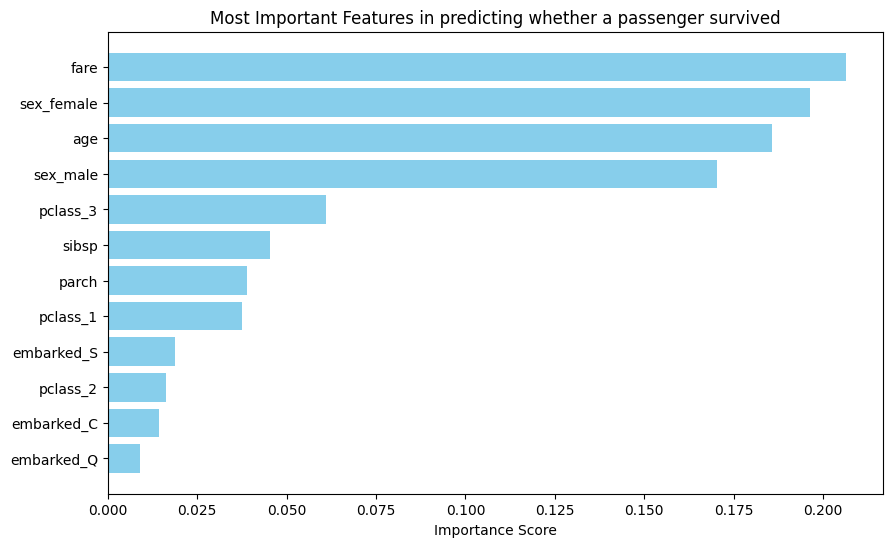


Test set accuracy: 81.01%


In [25]:
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting whether a passenger survived')
plt.xlabel('Importance Score')
plt.show()

# Print test score 
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

### Exercise 6. These are interesting results to consider. 
What can you say about these feature importances? Are they informative as is?


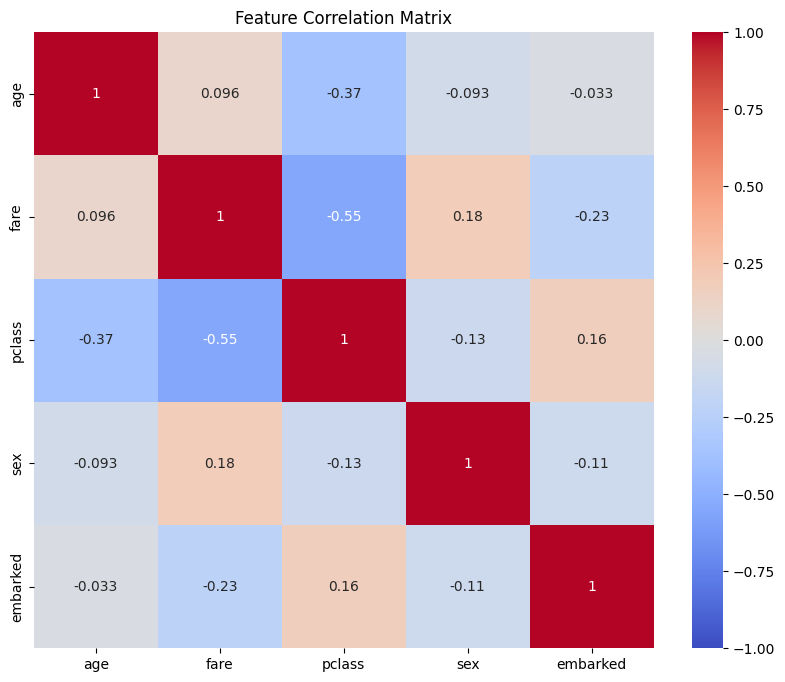

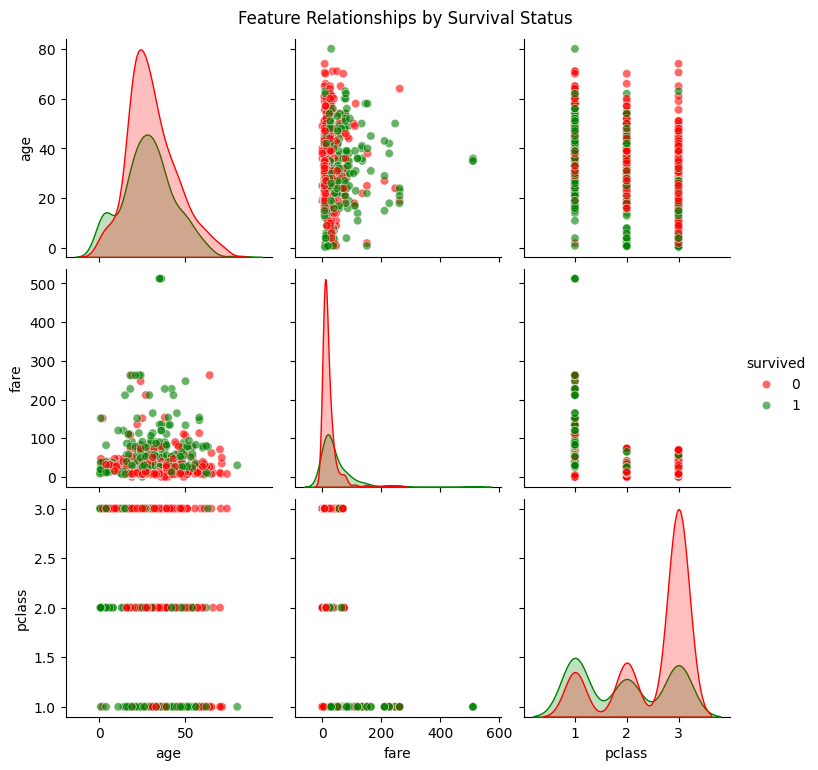

In [27]:
# Plot correlation matrix of key features
corr_features = ['age', 'fare', 'pclass', 'sex', 'embarked']
corr_df = df[corr_features].copy()

# Convert categorical to numeric for correlation
corr_df['sex'] = corr_df['sex'].map({'male': 0, 'female': 1})
corr_df['embarked'] = corr_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot of key features
sns.pairplot(df[['survived', 'age', 'fare', 'pclass']], 
             hue='survived', palette={0: 'red', 1: 'green'}, 
             plot_kws={'alpha': 0.6})
plt.suptitle('Feature Relationships by Survival Status', y=1.02)
plt.show()

<details><summary>Click here for some thoughts</summary>
    
```
The test set accuracy is somewhat satisfactory. However,regarding the feature impoirtances, it's crucially important to realize that there is most likely plenty of dependence amongst these variables, and a more detailed modelling approach including correlation analysis is required to draw proper conclusions. For example, no doubt there is significant information shared by the variables `age`, `sex_male`, and `who_man`.
```


## Try another model
In practice you would want to try out different models and even revisit the data analysis to improve
your model performance. Maybe you can engineer new features or impute missing values to be able to use more data.

With Scikit-learn's powerful pipeline class, this is easy to do in a few steps.
Let's update the pipeline and the parameter grid so we can train a Logistic Regression model and compare the performance of the two models.


In [26]:
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
model.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

model.param_grid = param_grid

# Fit the updated pipeline with Logistic Regression
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

### Exercise 7. Display the clasification report for the new model and compare the results to your previous model.


In [ ]:
# Enter your code here:
print(classification_report(..., ...))

In [28]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', 
                                     random_state=42,
                                     max_iter=1000))
])

# Define parameter grid for logistic regression
lr_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear']
}

# Train logistic regression with GridSearchCV
lr_model = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

print("\nTraining Logistic Regression model...")
lr_model.fit(X_train, y_train)
print("Logistic Regression training completed!")

# Get predictions
lr_y_pred = lr_model.predict(X_test)


Training Logistic Regression model...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logistic Regression training completed!


/tmp/ipykernel_2175/2009997313.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  report_comparison = report_comparison.applymap(lambda x: f"{x:.2%}")



Model Performance Comparison:
                          Random Forest Logistic Regression
Precision (Non-Survivors)        80.99%              81.58%
Recall (Non-Survivors)           89.09%              84.55%
F1 (Non-Survivors)               84.85%              83.04%
Precision (Survivors)            79.31%              73.85%
Recall (Survivors)               66.67%              69.57%
F1 (Survivors)                   72.44%              71.64%
Overall Accuracy                 80.45%              78.77%


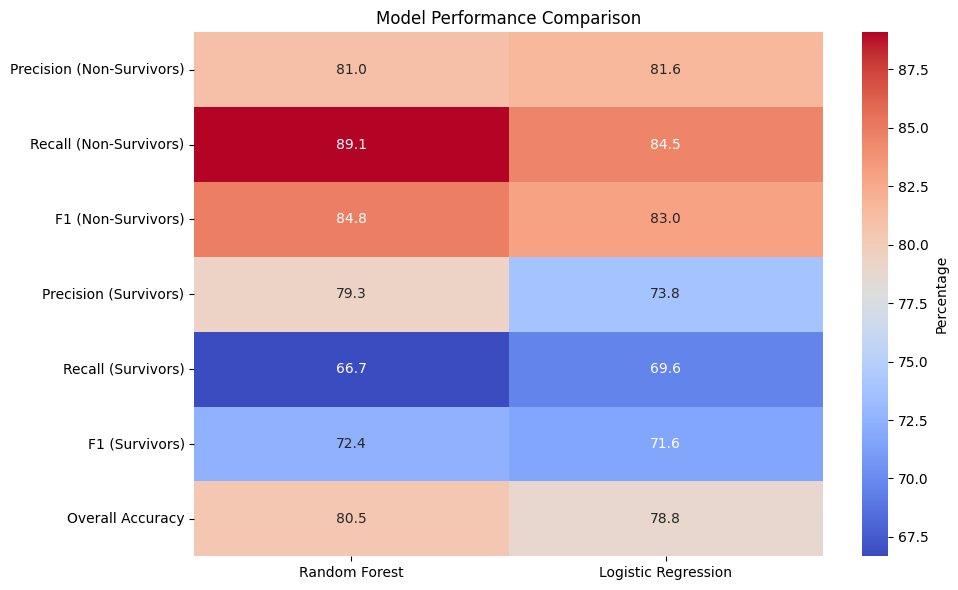

In [29]:
from sklearn.metrics import classification_report

# Get classification reports as dictionaries
rf_report = classification_report(y_test, y_pred, output_dict=True)
lr_report = classification_report(y_test, lr_y_pred, output_dict=True)

# Create comparison DataFrame
report_comparison = pd.DataFrame({
    'Random Forest': [
        rf_report['0']['precision'],
        rf_report['0']['recall'],
        rf_report['0']['f1-score'],
        rf_report['1']['precision'],
        rf_report['1']['recall'],
        rf_report['1']['f1-score'],
        rf_report['accuracy']
    ],
    'Logistic Regression': [
        lr_report['0']['precision'],
        lr_report['0']['recall'],
        lr_report['0']['f1-score'],
        lr_report['1']['precision'],
        lr_report['1']['recall'],
        lr_report['1']['f1-score'],
        lr_report['accuracy']
    ]
}, index=['Precision (Non-Survivors)', 
          'Recall (Non-Survivors)', 
          'F1 (Non-Survivors)',
          'Precision (Survivors)', 
          'Recall (Survivors)', 
          'F1 (Survivors)',
          'Overall Accuracy'])

# Format for better display
report_comparison = report_comparison.applymap(lambda x: f"{x:.2%}")

# Display comparison
print("\nModel Performance Comparison:")
print(report_comparison)

# Visual comparison
plt.figure(figsize=(10, 6))
sns.heatmap(report_comparison.apply(lambda x: x.str.rstrip('%').astype('float')), 
            annot=True, fmt='.1f', cmap='coolwarm', cbar_kws={'label': 'Percentage'})
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

<details><summary>Click here for the solution</summary>
    
```python
print(classification_report(y_test, y_pred))
```
All of the scores are slightly better for logistic regression than for random forest classification, although the differences are insignificant. 


### Exercise 8. Display the confusion matrix for the new model and compare the results to your previous model.


In [31]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion matrix for Logistic Regression
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

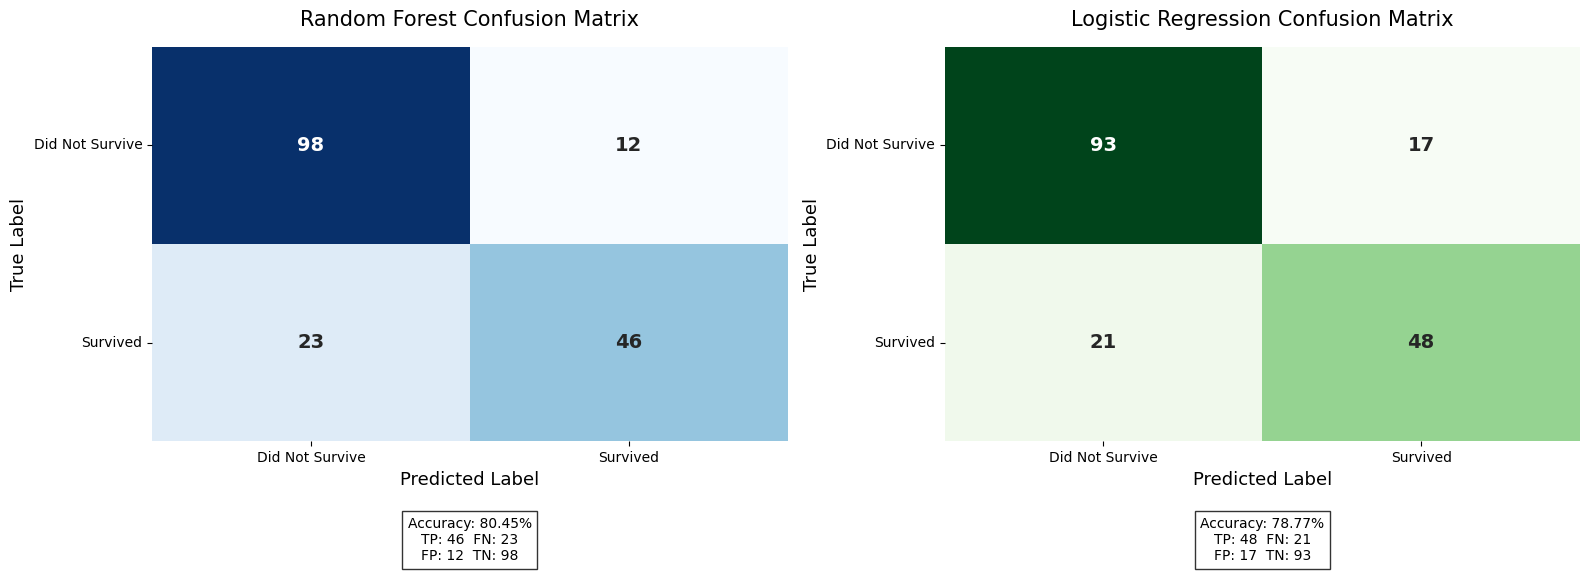

In [32]:
# Create side-by-side plots
plt.figure(figsize=(16, 6))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            annot_kws={'size': 14, 'weight': 'bold'}, cbar=False)
plt.title('Random Forest Confusion Matrix', fontsize=15, pad=15)
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.xticks([0.5, 1.5], ['Did Not Survive', 'Survived'])
plt.yticks([0.5, 1.5], ['Did Not Survive', 'Survived'], rotation=0)

# Add metrics for Random Forest
plt.text(0.5, -0.25, 
         f'Accuracy: {model.score(X_test, y_test):.2%}\n'
         f'TP: {rf_conf_matrix[1,1]}  FN: {rf_conf_matrix[1,0]}\n'
         f'FP: {rf_conf_matrix[0,1]}  TN: {rf_conf_matrix[0,0]}',
         ha='center', va='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            annot_kws={'size': 14, 'weight': 'bold'}, cbar=False)
plt.title('Logistic Regression Confusion Matrix', fontsize=15, pad=15)
plt.xlabel('Predicted Label', fontsize=13)
plt.ylabel('True Label', fontsize=13)
plt.xticks([0.5, 1.5], ['Did Not Survive', 'Survived'])
plt.yticks([0.5, 1.5], ['Did Not Survive', 'Survived'], rotation=0)

# Add metrics for Logistic Regression
plt.text(0.5, -0.25, 
         f'Accuracy: {lr_model.score(X_test, y_test):.2%}\n'
         f'TP: {lr_conf_matrix[1,1]}  FN: {lr_conf_matrix[1,0]}\n'
         f'FP: {lr_conf_matrix[0,1]}  TN: {lr_conf_matrix[0,0]}',
         ha='center', va='center', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<details><summary>Click here for the solution</summary>
    
```python
# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()
```

Again, the results show a slight improvement, with one more true positive and one more true negative.



Confusion Matrix Comparison:


,Metric,Random Forest,Logistic Regression,Difference
0,True Positives (Survived),46.0,48.0,2.0
1,True Negatives (Did Not Survive),98.0,93.0,-5.0
2,False Positives,12.0,17.0,5.0
3,False Negatives,23.0,21.0,-2.0
4,Total Correct,144.0,141.0,-3.0
5,Accuracy,80.45%,78.77%,-0.02


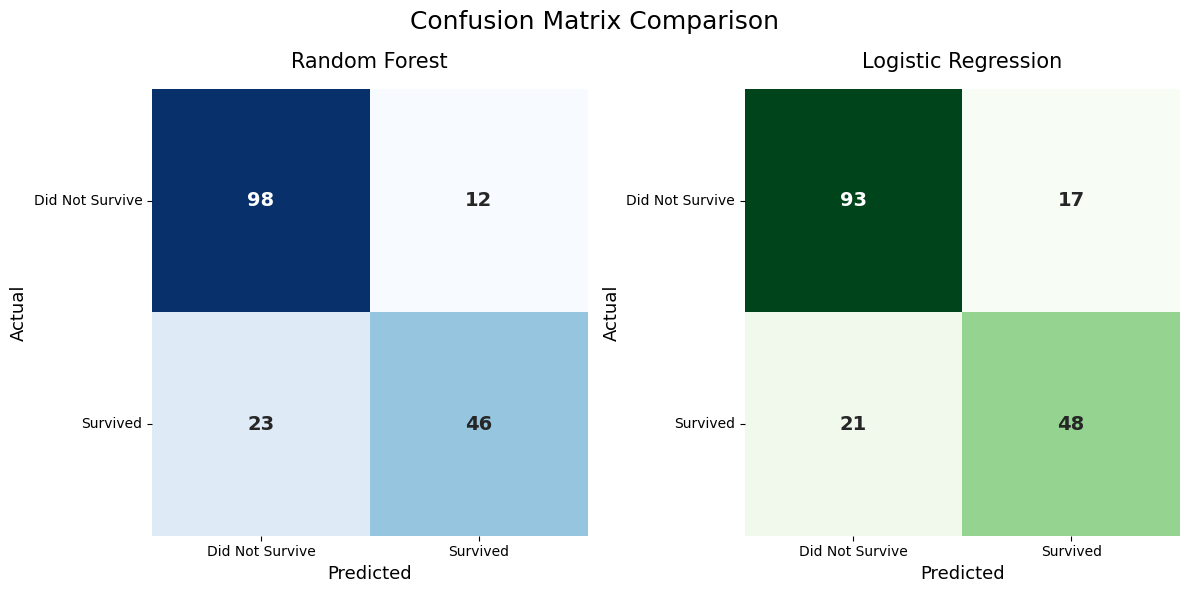

In [35]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
rf_conf_matrix = confusion_matrix(y_test, y_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['True Positives (Survived)', 
               'True Negatives (Did Not Survive)',
               'False Positives', 
               'False Negatives',
               'Total Correct',
               'Accuracy'],
    'Random Forest': [
        rf_conf_matrix[1,1],  # TP
        rf_conf_matrix[0,0],  # TN
        rf_conf_matrix[0,1],  # FP
        rf_conf_matrix[1,0],  # FN
        rf_conf_matrix[1,1] + rf_conf_matrix[0,0],
        model.score(X_test, y_test)  # Accuracy
    ],
    'Logistic Regression': [
        lr_conf_matrix[1,1],  # TP
        lr_conf_matrix[0,0],  # TN
        lr_conf_matrix[0,1],  # FP
        lr_conf_matrix[1,0],  # FN
        lr_conf_matrix[1,1] + lr_conf_matrix[0,0],
        lr_model.score(X_test, y_test)  # Accuracy
    ]
})

# Calculate differences
comparison_df['Difference'] = comparison_df['Logistic Regression'] - comparison_df['Random Forest']

# Format results
display_df = comparison_df.copy()
display_df['Random Forest'] = display_df.apply(
    lambda x: f"{x['Random Forest']}" if x['Metric'] != 'Accuracy' else f"{x['Random Forest']:.2%}", 
    axis=1
)
display_df['Logistic Regression'] = display_df.apply(
    lambda x: f"{x['Logistic Regression']}" if x['Metric'] != 'Accuracy' else f"{x['Logistic Regression']:.2%}", 
    axis=1
)
display_df['Difference'] = display_df.apply(
    lambda x: f"{x['Difference']}" if x['Metric'] != 'Accuracy' else f"{x['Difference']:+.2f}", 
    axis=1
)

print("\nConfusion Matrix Comparison:")
display(display_df)

# Create visual comparison
plt.figure(figsize=(12, 6))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', 
            annot_kws={'size': 14, 'weight': 'bold'}, cbar=False)
plt.title('Random Forest', fontsize=15, pad=15)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.xticks([0.5, 1.5], ['Did Not Survive', 'Survived'])
plt.yticks([0.5, 1.5], ['Did Not Survive', 'Survived'], rotation=0)

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Greens', 
            annot_kws={'size': 14, 'weight': 'bold'}, cbar=False)
plt.title('Logistic Regression', fontsize=15, pad=15)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.xticks([0.5, 1.5], ['Did Not Survive', 'Survived'])
plt.yticks([0.5, 1.5], ['Did Not Survive', 'Survived'], rotation=0)

plt.suptitle('Confusion Matrix Comparison', fontsize=18)
plt.tight_layout()
plt.show()

### Extract the logistic regression feature coefficients and plot their magnitude in a bar chart.


In [36]:
coefficients = model.best_estimator_.named_steps['classifier'].coef_[0]

# Combine numerical and categorical feature names
numerical_feature_names = numerical_features
categorical_feature_names = (model.best_estimator_.named_steps['preprocessor']
                                     .named_transformers_['cat']
                                     .named_steps['onehot']
                                     .get_feature_names_out(categorical_features)
                            )
feature_names = numerical_feature_names + list(categorical_feature_names)

### Exercise 9. Plot the feature coefficient magnitudes in a bar chart
What's different about this chart than the feature importance chart for the Random Forest classifier?


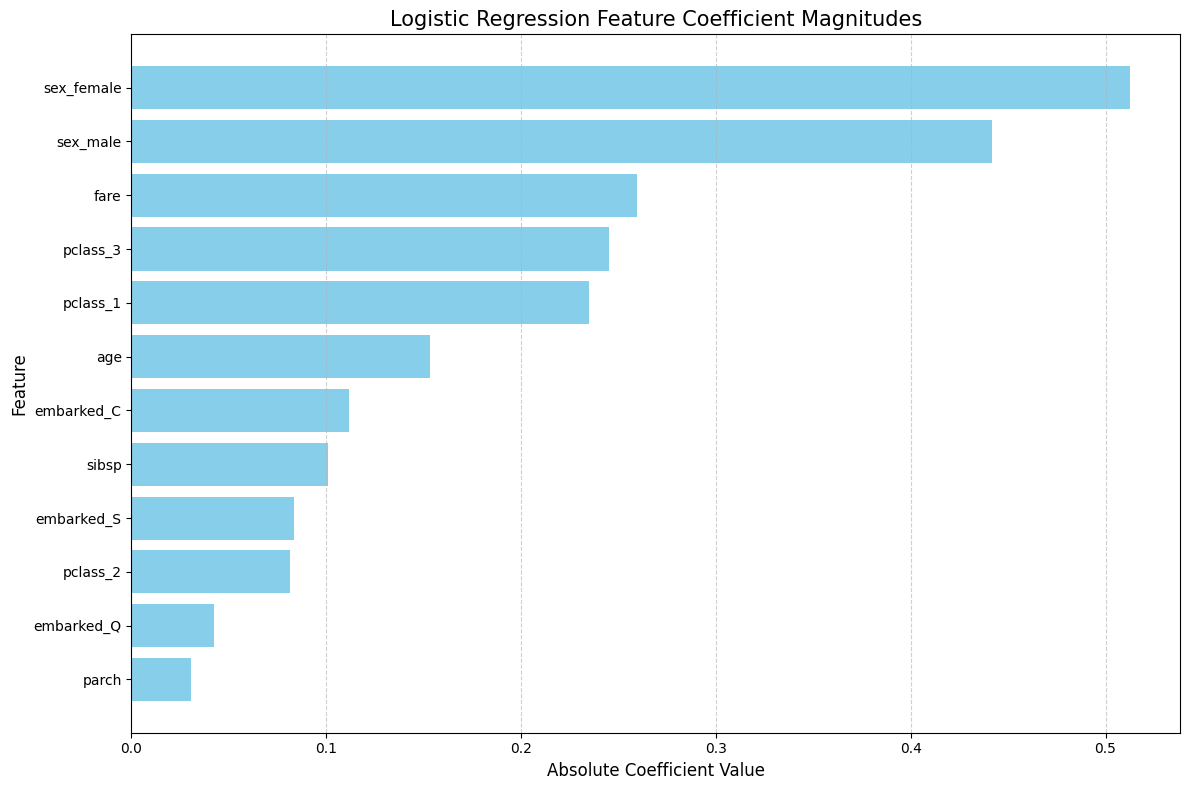


Test set accuracy: 78.77%


In [38]:
# Enter your code here:
# Extract coefficients from logistic regression model
lr_coefficients = lr_model.best_estimator_.named_steps['classifier'].coef_[0]

# Get feature names from preprocessing pipeline
cat_encoder = lr_model.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numerical_features + list(cat_features)

# Create coefficient DataFrame
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': lr_coefficients
}).sort_values(by='Coefficient', ascending=False, key=abs)  # Sort by absolute values

# Plotting coefficient magnitudes
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Coefficient'].abs(), color='skyblue')
plt.gca().invert_yaxis()  # Most important at top
plt.title('Logistic Regression Feature Coefficient Magnitudes', fontsize=15)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Print test score
test_score = lr_model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")


<details><summary>Click here for the solution</summary>
    
```python
# Create a DataFrame for the coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False, key=abs)  # Sort by absolute values

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'].abs(), color='skyblue')
plt.gca().invert_yaxis()
plt.title('Feature Coefficient magnitudes for Logistic Regression model')
plt.xlabel('Coefficient Magnitude')
plt.show()

# Print test score
test_score = model.best_estimator_.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")
```

Although the performances of the two models are virtually identical, the features that are important to the two models are very different. This suggests there must be more work to do to better grasp the actual feature importancdes. A smentioned above, it's crucially important to realize that there is most likely plenty of dependence amongst these variables, and a more detailed modelling approach including correlation analysis is required to draw proper conclusions. For example, there is significant information implied between the variables `who_man`, `who_woman`, and `who_child`, because if a person is neither a man nor a woman, then they muct be a child.


### Congratulations! You've made it this far and are now fully equipped to take on your final project!

## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

### Other Contributor(s)

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" taget="_blank">Abhishek Gagneja</a>

<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-27 | 0.1  | Jeff Grossman    | Create lab |
| 2024-12-03 | 0.2  | Abhishek Gagneja | Typos corrected |

 -->
<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
